# HW3 Problem 1 #


Use  a Benson-type  Group  Additivity  Method  to  estimate  the  thermochemical  parameters  (enthalpy  of  formation,  entropy  of  formation,  heat  capacity)  for  two  different  C6H11  radicals:    cyclohexyl  radical  and  hexen-6-yl  radical.    Then  compute  the  temperature at which these two radicals would be in 50:50 equilibrium (i.e. Keq = 1) for the ring-opening reaction (i.e. cyclohexyl radical <=> hexen-6-yl radical).  The hexen-6-yl  radical  is  CH2CHCH2CH2CH2CH2.  Remember  you  can  use  EQUIL  in  CHEMKIN  or  CANTERA to do this calculation.

In [8]:
# add appropriate modules
import pandas as pd
import numpy as np
import time
import cantera as ct
from matplotlib import pyplot as plt
import csv
import math
from operator import add

from IPython.display import Image

RMG Groups used for Group additivity estimates:

cyclohexane Radical:

group(Cs-CsCsHH) * 6 +
ring(Cyclohexane) +
radical(cyclohexane)

Hexene species:

group(Cs-CsCsHH)
group(Cs-CsCsHH)
group(Cs-CsCsHH)
group(Cs-CsCsHH)
group(Cs-CsHHH)
group(Cs-CsHHH)
radical(RCCJC)
radical(RCCJ)
radical(RCCJ)

1200  :  2.4027855428886697  :  [-47.51739103 -46.64076233]  :  0.4161836261082972
1300  :  1.087919454854679  :  [-49.74399712 -49.65973   ]  :  0.919185694802725
1305  :  1.04937315834518  :  [-49.85266167 -49.80446867]  :  0.9529498558710617
1311.7  :  1.0003374835558387  :  [-49.99789093 -49.9975535 ]  :  0.9996626303008871
1312  :  0.9982090852666379  :  [-50.00438357 -50.00617609]  :  1.0017941278633862
1325  :  0.9111486511830291  :  [-50.2849001  -50.37794932]  :  1.0975157551971424
1350  :  0.7687516907355341  :  [-50.81985189 -51.08283915]  :  1.3008101472182907
1400  :  0.5585952757889557  :  [-51.87252379 -52.45485388]  :  1.7902049002967442
1500  :  0.3170722913523699  :  [-53.91286485 -55.06149034]  :  3.153854900832934
2000  :  0.04906455716231866  :  [-63.03226273 -66.04688109]  :  20.381311028483005
equilibrium constant = 1 at 1312K


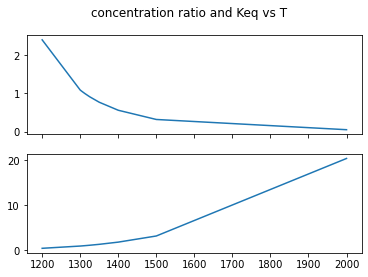

In [11]:
# Equilibrium calcs 
cti_file = '/Users/blais.ch/_01_code/MIT_Kinetics_HW/assignments/HW3/P1/Thermo.cti'
gas = ct.Solution(cti_file)

# Gas conditions
reactorTemperature = 1000  # Kelvin
reactorPressure = ct.one_atm 
concentrations = {'C6H11R': 0.5, 'C6H11': 0.5}
gas.TPX = reactorTemperature, reactorPressure, concentrations 
ratio = []
equilib = []
temps = [1200, 1300, 1305, 1311.7, 1312, 1325, 1350, 1400, 1500, 2000]

for i in range(len(temps)):
    reactorTemperature = temps[i]
    gas.TPX = reactorTemperature, reactorPressure, concentrations
    gas.equilibrate('TP')
    ratio.append(gas.concentrations[0]/gas.concentrations[1])
    equilib.append(math.exp(gas.standard_gibbs_RT[0]-gas.standard_gibbs_RT[1]))
    print(temps[i], ' : ', ratio[i], ' : ', gas.standard_gibbs_RT, ' : ', equilib[i])
    

print('equilibrium constant = 1 at 1312K')
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle('concentration ratio and Keq vs T')
axs[0].plot(temps, ratio)
axs[1].plot(temps, equilib)
